# Презентационный проект по Методу Опорных Векторов.

**Задача:**

Используя данные, ниже разработайте модель машинного обучения, которая будет предсказывать, на основе некоторых химических тестов, является ли вино настоящим или поддельным.

**Импорт библиотек.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Импорт DataFrame.**

In [2]:
df = pd.read_csv('SVM_Project_Data.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**Соотношение в Целевой переменной.**

Необходимо выяснить процентное соотношение Legit к Fraud, для обоих групп вин Red и White.

<Axes: xlabel='type', ylabel='count'>

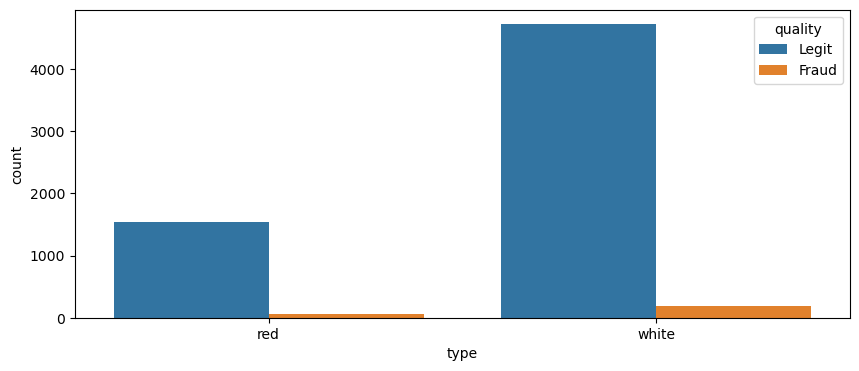

In [4]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(x='type',hue='quality',data=df)

In [5]:
reds = df[df["type"]=='red']

In [6]:
whites = df[df["type"]=='white']

In [7]:
print("Процент подделки в Красных винах:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Процент подделки в Красных винах:
3.9399624765478425


In [8]:
print("Процент подделки в Белых винах:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Процент подделки в Белых винах:
3.7362188648427925


**Перевод значений в дамми переменные.**

С целью упрощения работы с данными.

In [9]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [10]:
df['type'] = pd.get_dummies(df['type'],drop_first=True, dtype=int)

In [11]:
df = df.drop('quality',axis=1)

**Графическое отображение корреляции, между признаками и Целевой переменной.**

<Figure size 1000x400 with 0 Axes>

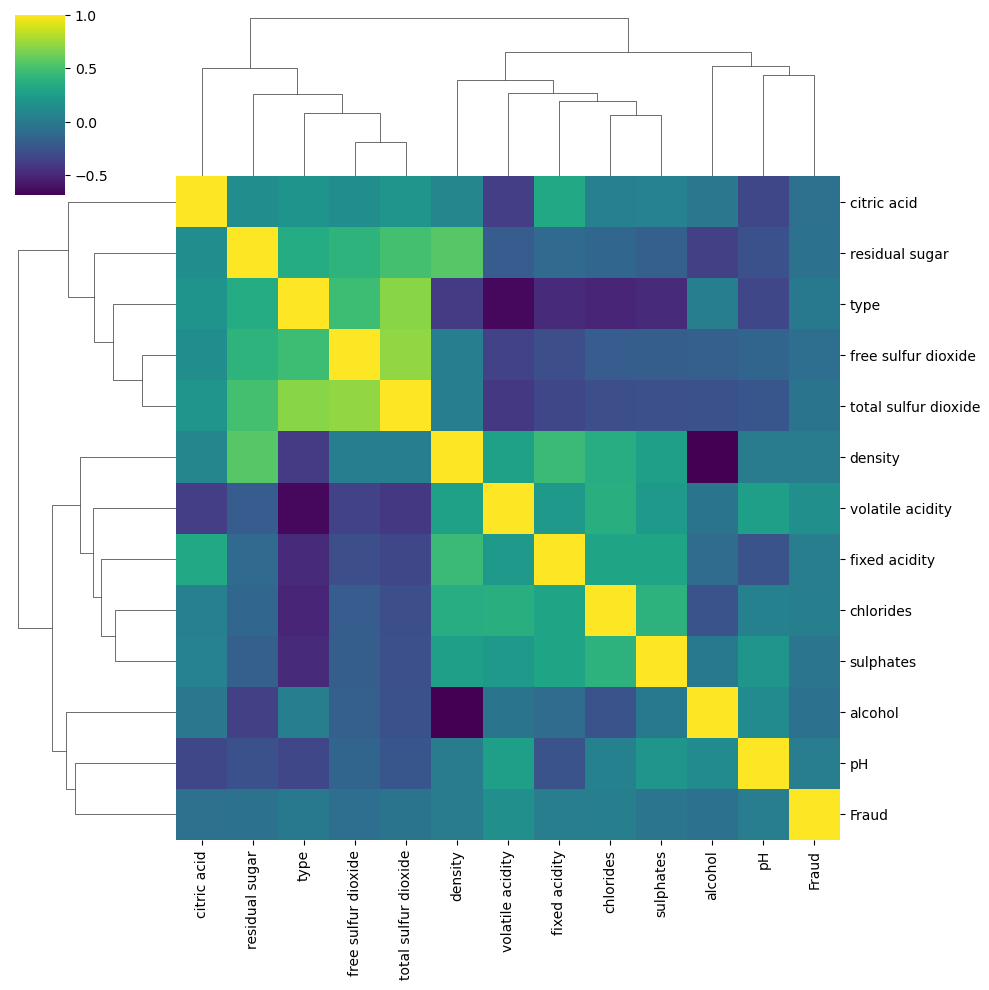

In [13]:
plt.figure(figsize=(10,4), dpi=100)
sns.clustermap(df.corr(),cmap='viridis')

**Разделяем данные.**

In [14]:
X = df.drop('Fraud',axis=1)

In [15]:
y = df['Fraud']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Масштабируем данные.**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
scaled_X_test = scaler.transform(X_test)

**Обучаем модель через поиск наилучших значений гиперпараметров по сетке.**

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC(class_weight='balanced')

In [24]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}

In [28]:
grid = GridSearchCV(svc,param_grid)

In [29]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [30]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

**Работа с метриками.**

Суммарно обнаруженно 102 из 650 наблюдений, которые были ошибочно классифицированны.

Вероятность обнаружения оригинального вина 98%.

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
y_pred = grid.predict(scaled_X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[531,  92],
       [ 10,  17]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**Работа с новыми данными.**

Наблюдение классифицировано как 0 == Оригинальное вино.

In [50]:
new_data = [[11.2, 0.88, 0.04, 2.6, 0.075, 
            25.0, 54.0, 0.9968, 3.16, 0.68, 
            9.8, 1]]

In [51]:
grid.predict(new_data)

array([0], dtype=int64)